## Advance Deep Learning best practices

In [1]:
from keras import models, layers
from keras import Input

Using TensorFlow backend.


### defining the models 

In [2]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [3]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='sigmoid')(x)

model2 = models.Model(input_tensor, output_tensor)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### Compiling

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [5]:
import numpy as np

x = np.random.random((1000, 64))
y = np.random.random((1000, 10))

In [6]:
hist = model.fit(x, y, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 11.7262
Epoch 2/10
1000/1000 [==============================] - 0s 30us/step - loss: 11.5810
Epoch 3/10
1000/1000 [==============================] - 0s 39us/step - loss: 11.5642
Epoch 4/10
1000/1000 [==============================] - 0s 40us/step - loss: 11.5561
Epoch 5/10
1000/1000 [==============================] - 0s 30us/step - loss: 11.5462
Epoch 6/10
1000/1000 [==============================] - 0s 42us/step - loss: 11.5391
Epoch 7/10
1000/1000 [==============================] - 0s 33us/step - loss: 11.5326
Epoch 8/10
1000/1000 [==============================] - 0s 30us/step - loss: 11.5283
Epoch 9/10
1000/1000 [==============================] - 0s 37us/step - loss: 11.5242
Epoch 10/10
1000/1000 [==============================] - 0s 37us/step - loss: 11.5198


In [23]:
import matplotlib.pyplot as plt
hist.history

{'loss': [11.726151199340821,
  11.580985145568848,
  11.564181724548339,
  11.556144683837891,
  11.546201774597169,
  11.53914582824707,
  11.532576522827149,
  11.52828133392334,
  11.524244232177734,
  11.519769874572754]}

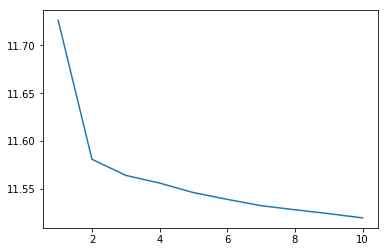

In [26]:
plt.plot(range(1, 11), hist.history['loss'])
plt.show()

In [36]:
score = model.evaluate(x, y)
score

1000/1000 [==============================] - 0s 83us/step


11.515640228271485

In [29]:
hist2 = model2.fit(x, y, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 146us/step - loss: 11.5570
Epoch 2/10
1000/1000 [==============================] - 0s 37us/step - loss: 11.5294
Epoch 3/10
1000/1000 [==============================] - 0s 45us/step - loss: 11.5220
Epoch 4/10
1000/1000 [==============================] - 0s 37us/step - loss: 11.5184
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 11.5165
Epoch 6/10
1000/1000 [==============================] - 0s 43us/step - loss: 11.5142
Epoch 7/10
1000/1000 [==============================] - 0s 45us/step - loss: 11.5131
Epoch 8/10
1000/1000 [==============================] - 0s 37us/step - loss: 11.5114
Epoch 9/10
1000/1000 [==============================] - 0s 36us/step - loss: 11.5103
Epoch 10/10
1000/1000 [==============================] - 0s 44us/step - loss: 11.5091


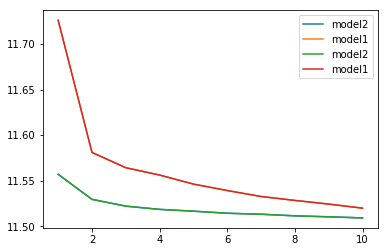

In [33]:
plt.plot(range(1, 11), hist2.history['loss'], label='model2')
plt.plot(range(1, 11), hist.history['loss'], label='model1')
plt.legend()
plt.show()

In [35]:
score2 = model2.evaluate(x, y)
score2

1000/1000 [==============================] - 0s 71us/step


11.50709846496582